It is insanely useful to create movies to illustrate a talk, blog post or just to include in a notebook:

In [1]:
from IPython.display import HTML
HTML('<center><video controls autoplay loop src="../files/2016-11-15_noise.mp4" width=61.8%/></center>')

For years I have used a custom made solution made around saving single frames and then calling ``ffmpeg`` to save that files to a movie file. That function (called ``anim_save`` had to be maintained accross different libraries to reflect new needs (going to WEBM and MP4 formats for instance). That made the code longer than necessary and had not its place in a scientific library.

Here, I show how to use the ``animation`` library from matplotlib to replace that 
<!-- TEASER_END -->

There quite a few pages on the web describing a possible alternative:

 * https://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/
 * this SO post https://stackoverflow.com/questions/18019477/how-can-i-play-a-local-video-in-my-ipython-notebook

In [2]:
import numpy as np
image = np.random.rand(64, 16, 128)
from IPython.display import display, clear_output, HTML, Image

In [3]:
import sys
import matplotlib.pyplot as plt
from matplotlib import animation, rc
animation.rcParams['animation.writer'] = 'ffmpeg'

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
plt.close()
ax.xlim = (0, image.shape[1])
ax.ylim = (0, image.shape[2])
ax.set_xticks([])
ax.set_yticks([])
img = ax.imshow(image[:, :, 0].T, cmap='gray')
img.set_interpolation('nearest')
def animate(i): 
    #img = ax.imshow(image[:, :, i].T, cmap='gray')
    img.set_data(image[:, :, i].T)
    #ax.xaxis.set_visible(False)
    #ax.yaxis.set_visible(False)
    clear_output(wait=True)
    print ('It: %i'%i)
    sys.stdout.flush()
    return (img,)
            
# call the animator. blit=True means only re-draw the parts that have changed.
# *interval* draws a new frame every *interval* milliseconds.
anim = animation.FuncAnimation(fig, animate, frames=image.shape[-1], interval=50, blit=True)
HTML(anim.to_html5_video()) 

It: 127


The same ``anim`` object can be used to save the movie as a file:

In [4]:
help(anim.save)

Help on method save in module matplotlib.animation:

save(filename, writer=None, fps=None, dpi=None, codec=None, bitrate=None, extra_args=None, metadata=None, extra_anim=None, savefig_kwargs=None) method of matplotlib.animation.FuncAnimation instance
    Saves a movie file by drawing every frame.
    
    *filename* is the output filename, e.g., :file:`mymovie.mp4`
    
    *writer* is either an instance of :class:`MovieWriter` or a string
    key that identifies a class to use, such as 'ffmpeg' or 'mencoder'.
    If nothing is passed, the value of the rcparam `animation.writer` is
    used.
    
    *dpi* controls the dots per inch for the movie frames. This combined
    with the figure's size in inches controls the size of the movie.
    
    *savefig_kwargs* is a dictionary containing keyword arguments to be
    passed on to the 'savefig' command which is called repeatedly to save
    the individual frames. This can be used to set tight bounding boxes,
    for example.
    
    *ext

In [5]:
anim.save('../files/2016-11-15_noise.mp4', writer='ffmpeg', fps=10, dpi=100, metadata={'title':'test'})

It: 127


In [6]:
!ffprobe ../files/2016-11-15_noise.mp4

ffprobe version 3.2.2 Copyright (c) 2007-2016 the FFmpeg developers
  built with Apple LLVM version 8.0.0 (clang-800.0.42.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.2.2 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libxvid --enable-opencl --disable-lzma --enable-vda
  libavutil      55. 34.100 / 55. 34.100
  libavcodec     57. 64.101 / 57. 64.101
  libavformat    57. 56.100 / 57. 56.100
  libavdevice    57.  1.100 / 57.  1.100
  libavfilter     6. 65.100 /  6. 65.100
  libavresample   3.  1.  0 /  3.  1.  0
  libswscale      4.  2.100 /  4.  2.100
  libswresample   2.  3.100 /  2.  3.100
  libpostproc    54.  1.100 / 54.  1.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '../files/2016-11-15_noise.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: is

## using aPNG

Write numpy array(s) to a PNG or animated PNG file using https://pypi.python.org/pypi/numpngw

In [7]:
!pip3 install -U numpngw

Requirement already up-to-date: numpngw in /usr/local/lib/python3.5/site-packages
Requirement already up-to-date: numpy>=1.6.0 in /usr/local/lib/python3.5/site-packages (from numpngw)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpngw import AnimatedPNGWriter


def update_line(num, data, line):
    line.set_data(data[:, :num+1])
    return line,

fig = plt.figure(figsize=(5.75, 5.6))
ax = fig.add_subplot(111, xlim=(-1, 1), ylim=(-1, 1),
                     autoscale_on=False,  aspect='equal',
                     title="Matplotlib Animation")

num_frames = 20

theta = np.linspace(0, 24*np.pi, num_frames)
data = np.exp(1j*theta).view(np.float64).reshape(-1, 2).T

lineplot, = ax.plot([], [], 'c-', linewidth=3)

ani = animation.FuncAnimation(fig, update_line, frames=num_frames,
                              init_func=lambda : None,
                              fargs=(data, lineplot))
writer = AnimatedPNGWriter(fps=2)
ani.save('numpngw.png', dpi=50, writer=writer)

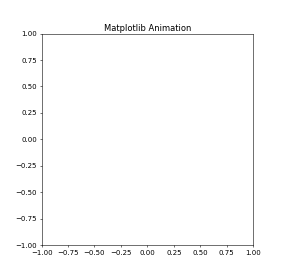

In [9]:
Image('numpngw.png')

## Alien life

Update: let's implement the code @ https://github.com/rougier/alien-life/blob/master/alien-life.py

In [3]:
!python3 -m pip install noise

    100% |████████████████████████████████| 133kB 2.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for noise ... done
  Stored in directory: /Users/laurentperrinet/Library/Caches/pip/wheels/72/44/b7/cfdc3c019d2f904234314fe6f15d4ffe0ecc70392ba0d24ee7
Successfully built noise


In [4]:
!python3 -m pip install tqdm

251it [04:39,  1.03s/it]                         


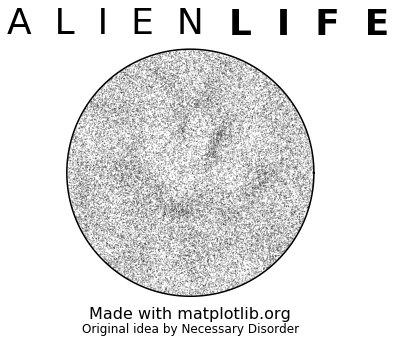

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from noise._simplex import noise4
import matplotlib.animation as animation
import tqdm


n = 40000
radius = 200
width,height = 500, 500
length = 50
scale = 0.005
time = 0

T = np.random.uniform(0, 2*np.pi, n)
R = np.sqrt(np.random.uniform(0, 1, n))
P = np.zeros((n,2))
X,Y = P[:,0], P[:,1]
X[...] = R*np.cos(T)
Y[...] = R*np.sin(T)
intensity = np.power(1.001-np.sqrt(X**2 + Y**2), 0.75)
X[...] = X*radius + width//2
Y[...] = Y*radius + height//2


def update(*args):
    global P, time, pbar

    time += 2*0.002
    P_ = np.zeros((n,2))
    cos_t = 1.5*np.cos(2*np.pi*time)
    sin_t = 1.5*np.sin(2*np.pi*time)
    for i in range(n):
        x, y = P[i]
        dx = noise4(scale*x,     scale*y, cos_t, sin_t, 2)
        dx *= intensity[i]*length
        dy = noise4(100+scale*x, 200+scale*y, cos_t, sin_t, 2)
        dy *= intensity[i]*length
        P_[i] = x + dx, y +dy
    pbar.update(1)
    scatter.set_offsets(P_)
    

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1, aspect=1, frameon=False)
scatter = plt.scatter(X, Y, s=1.5, edgecolor="none", facecolor="black", alpha=.25)

T = np.linspace(0, 2*np.pi, 200)
X = width/2  + radius*np.cos(T)
Y = height/2 + radius*np.sin(T)
plt.plot(X, Y, color="k", linewidth=1.5)


ax.set_xticks([])
ax.set_yticks([])
font = "Source Sans Pro"
font = "DejaVu Sans"
ax.text(0.55, 1.11, "A  L  I  E  N", size=36,
        name=font, weight=100,
        ha="right", va="top", transform=ax.transAxes)
ax.text(0.55, 1.11 - 0.0025, "  L  I  F  E", size=36,
        name=font, weight=600,
        ha="left", va="top", transform=ax.transAxes)
ax.text(0.5, -0.05, "Made with matplotlib.org", size=16,
        name=font, weight=100,
        ha="center", va="bottom", transform=ax.transAxes)
ax.text(0.5, -0.10, "Original idea by Necessary Disorder", size=12,
        name=font, weight=100,
        ha="center", va="bottom", transform=ax.transAxes)


anim = animation.FuncAnimation(fig, update, frames=250, interval=20)
pbar = tqdm.tqdm(total=250)
anim.save('alien-life.mp4', writer='ffmpeg', fps=60)
#anim.save('alien-life.gif', writer='imagemagick', fps=30)
pbar.close()
plt.show()